# 지역별 레이더차트 그리기

- 참고자료: [레이더차트 그리기](https://zephyrus1111.tistory.com/63), [Matplotlib 기초문법](https://wikidocs.net/book/5011)를 참고하여 작성
- matplotlib의 pyplot 사용

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
df = pd.read_excel('data/score_가격&median으로 필터링.xlsx', sheet_name = 1)
df.head()

,dong,dong_code,safety_score_minmax,selfcare_score_minmax,leisure_score_minmax,traffic_score_minmax,consume_score_minmax,sum
0,역삼1동,1123064,6.505596,10.000000,8.698384,9.024968,10.000000,44.228949
1,서교동,1114066,6.097136,8.330126,8.698384,10.000000,10.000000,43.125647
2,논현2동,1123053,5.646436,9.279599,2.679119,5.584292,8.986459,32.175905
3,논현1동,1123052,4.986968,8.422111,2.896152,3.103981,8.627136,28.036349
4,서초3동,1122053,7.331865,4.661213,2.978336,8.196490,8.438792,31.606697


In [3]:
df = df[(df['dong'] == '흑석동') | (df['dong'] == '공릉2동') | (df['dong'] == '공덕동')]
df = df.iloc[:,[0,2,3,4,5,6]]

In [4]:
df.reset_index(drop=True, inplace = True)

In [5]:
df.columns = ['dong','치안','자기관리','여가','교통','소비']

In [6]:
df

,dong,치안,자기관리,여가,교통,소비
0,공릉2동,5.486919,1.596685,6.420723,4.944603,3.609722
1,흑석동,5.393207,2.091331,6.093730,6.227622,2.628626
2,공덕동,8.182793,2.689852,2.173490,2.810663,3.080855


### 흑석동, 공릉2동, 공덕동 레이더 차트 만들기

In [7]:
labels = df.columns[1:6] #레이더 차트 요소
num_labels = len(labels)

In [8]:
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

In [9]:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

In [10]:
fig = plt.figure(figsize=(40,50))
fig.set_facecolor('white')

<Figure size 2880x3600 with 0 Axes>

In [11]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/ARIALUNI.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

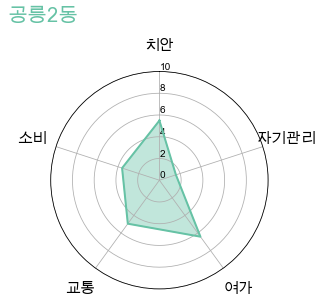

In [17]:
#공릉2동

color = my_palette(0)
data = df.iloc[0].drop('dong').tolist()
data += data[:1]

ax = plt.subplot(1,1,1, polar=True)
ax.set_theta_offset(pi / 2) ## 시작점
ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
plt.xticks(angles[:-1], labels, fontsize=15) ## x축 눈금 라벨
ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
plt.ylim(0,10)
    
ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.title('공릉2동', size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.show()

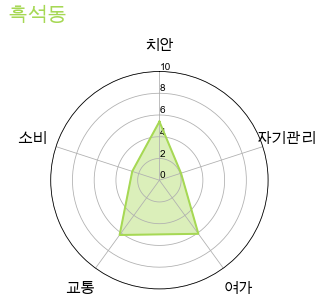

In [239]:
#흑석동
color = my_palette(1)
data = df.iloc[1].drop('dong').tolist()
data += data[:1]

ax = plt.subplot(1,1,1, polar=True)
ax.set_theta_offset(pi / 2) ## 시작점
ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
plt.xticks(angles[:-1], labels, fontsize=15) ## x축 눈금 라벨
ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
plt.ylim(0,10)
    
ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.title('흑석동', size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.show()

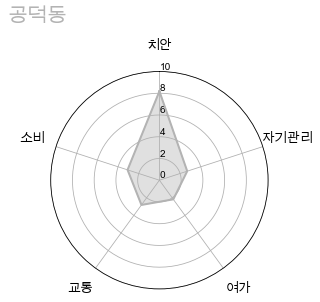

In [240]:
#공덕동
color = my_palette(2)
data = df.iloc[2].drop('dong').tolist()
data += data[:1]

ax = plt.subplot(1,1,1, polar=True)
ax.set_theta_offset(pi / 2) ## 시작점
ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
plt.ylim(0,10)
    
ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.title('공덕동', size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.show()